In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [6]:
model = keras.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(4,)))
model.add(layers.Dense(3,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


첫 번째 Dense 층:
16: 첫 번째 Dense 층의 뉴런 수.
activation='relu': 활성화 함수로 ReLU(Rectified Linear Unit) 함수를 사용.
모델에 비선형성을 추가하여 복잡한 패턴을 학습.
input_shape=(4,): 입력의 크기를 지정. 입력의 크기가 4인 벡터(4가지 속성(꽃받침
길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)로 설정.
첫 번째 층에만 사용되며, 모델에 입력 데이터의 형태를 알려준다.
Dense layer는 입력으로 임의의 차원을 가진 데이터를 받을 수 있다.
파라미터의 개수 감소와 기존 모델과의 호환성을 위해 대체로 1차원 배열을
입력

두 번째 Dense 층:
3: 두 번째 Dense 층의 뉴런 수. 이 값은 출력 클래스의 개수와 일치해야 한다.
3개의 클래스(붓꽃 데이터셋의 클래스 수)를 분류하는 모델이므로 3으로 설정.
activation='softmax': 활성화 함수로 소프트맥스(Softmax) 함수를 사용.
소프트맥스 함수는 출력 값들의 합이 1이 되도록 정규화하여
각 클래스에 대한 확률 분포를 얻을 수 있다

Fully connected layer의 가중치와 편향(bias)는
모델의 학습 과정에서 자동으로 결정.
초기에는 무작위로 설정되며,
학습 데이터에 맞게 조정되어 가장 최적의 값을 찾게 된다.
가중치는 입력과 출력 사이의 연결 강도를 나타내는 매개 변수이며,
편향은 각 뉴런이 얼마나 쉽게 활성화되는지를 조절하는 매개 변수입니다.
신경망은 역전파(backpropagation) 알고리즘과 경사 하강법(gradient descent)을
사용하여 가중치와 편향을 조금씩 조정하면서 최적의 값을 찾아간다

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2344 - loss: 1.7307 - val_accuracy: 0.2000 - val_loss: 1.9025
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2958 - loss: 1.6739 - val_accuracy: 0.2000 - val_loss: 1.8533
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2844 - loss: 1.5624 - val_accuracy: 0.2000 - val_loss: 1.8055
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2415 - loss: 1.5579 - val_accuracy: 0.2000 - val_loss: 1.7575
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2425 - loss: 1.6411 - val_accuracy: 0.2000 - val_loss: 1.7099
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2654 - loss: 1.5319 - val_accuracy: 0.2000 - val_loss: 1.6646
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2323 - loss: 1.4855 - val_accuracy: 0.2000 - val_loss: 1.6200
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2562 - loss: 1.4343 - val_accuracy: 0.2000 - val_loss:

입력 데이터 X_train과 출력 데이터 y_train을 사용하여 모델을 10번의 에포크 동안 학습.
각 학습 단계에서는 32개의 샘플을 한 번에 처리하며, 가중치를 업데이트.
동시에 검증 데이터인 X_test와 y_test를 사용하여 모델의 성능을 평가

Compile : 학습에 필요한 설정을 세팅/모델링 하는 과정
optimizer='adam':모델의 가중치를 업데이트하는 방법.
'adam': Adam(Optimization Algorithm for Adaptive Moment Estimation) 경사 하강법의
변종으로, 학습 속도를 조정하면서 가중치를 업데이트. 다양한 문제에 대해 좋은 성능.
loss='sparse_categorical_crossentropy': 손실 함수를 지정.
'sparse_categorical_crossentropy': 분류 문제에서 사용, 각 클래스의 정수 레이블과
예측값을 비교하여 손실을 계산. 클래스가 상호 배타적인 경우에 주로 사용.
정수 형태의 클래스 레이블(타겟 클래스 레이블)을 입력으로 사용
metrics=['accuracy’]: 정확히 분류된 샘플의 비율

fit 메서드 : 주어진 학습데이터를 사용하여 모델을 학습
epochs: 전체 학습 데이터셋을 한 번 모두 사용하여 학습하는 단위.
에포크 수는 학습 반복 횟수를 결정하며, 값이 클수록 모델이 더 많이 학습.
과적합(overfitting)이 발생할 수 있으므로 적절한 값으로 설정해야 .
batch_size: 한 번의 학습 단계에서 처리되는 샘플의 수.
배치 크기는 학습 속도와 메모리에 영향을 미치며, 일반적으로 2의 제곱수로 설정.
validation_data: 모델이 학습 중에 성능을 평가하는 데 사용. 튜플 형태

In [10]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Test Loss: {}, Test Accuracy: {}".format(loss,accuracy))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9333 - loss: 0.2527
Test Loss: 0.25268620252609253, Test Accuracy: 0.9333333373069763


In [11]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


argmax: 주어진 축(axis)을 따라 배열의 가장 큰 값의 인덱스를 반환하는 NumPy 함수.
예측 결과로 나온 predictions 배열에서 각 샘플에 대한 예측 클래스를 추출하는데 사용.
붓꽃 데이터는 세 가지 다른 종류의 붓꽃을 분류하는 문제
예측 결과로 나온 predictions 배열은 각 샘플에 대한 확률값을 나타낸다.
argmax(predictions, axis=1)를 사용하면 각 행에서 가장 큰 값의 인덱스를 추출할 수 있다.
반환된 인덱스가 0이면 첫 번째 클래스, 1이면 두 번째 클래스, 2이면 세 번째 클래스

붓꽃 데이터의 ANN 코드에서
모델의 마지막 Dense layer에 3개의 출력 뉴런이 있으며,
활성화 함수로 소프트맥스 함수가 사용되었다.
모델의 예측 결과로 나오는 predictions는 3개의 클래스에 대한 확률값의 배열.
각 클래스에 속할 확률을 나타내며, 합이 1이 되도록 정규화되어 있다.

In [12]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



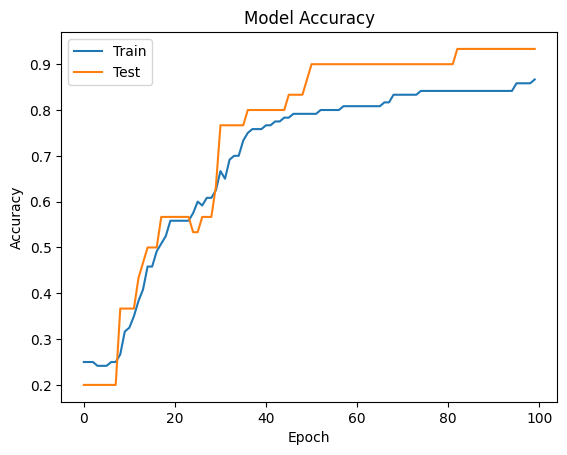

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc='upper left')
plt.show()

데이터 전처리: 데이터셋을 훈련 데이터와 테스트 데이터 > 입력 데이터(X)를 정규화
모델 구성: Sequential 모델을 생성.
Dense 층을 추가하여 모델을 구성.
첫 번째 Dense 층은 16개의 뉴런과 ReLU 활성화 함수, 입력의 크기는 4.
두 번째 Dense 층은 3개의 뉴런과 소프트맥스 활성화 함수.
모델 컴파일 : compile 메서드를 사용하여 분석 조건에 맞는 모델구성(모델링).
Optimizer로 ＇adam＇. Loss로 ＇sparse_categorical_crossentropy’,
metrics로 ＇accuracy＇를 선택
모델 훈련: fit 메서드를 사용하여 모델을 조건에 따라 훈련.
훈련 데이터와 해당하는 레이블을 입력으로 제공.
Epochs 지정. batch_size 지정. 검증 데이터(validation_data)를 제공.
모델 평가: 테스트 데이터로 모델을 평가.
예측:테스트 데이터에 대한 예측을 수행.